<a href="https://colab.research.google.com/github/devaniket16/Brain_Tumer-ML/blob/main/brain_tumer_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  # linear algebra
import pandas as pd # data processing csv file I/O

import os
for dirname, _, filenames in os.walk('https://drive.google.com/drive/folders/1NBNdXovaHC6MuSPIXOmRkWRsOQjSPRUH'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

import keras
from keras.models import Sequential # sequencial data
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout # hidden layers between I/O
# conv2D : create convolutional 2D neural network
# Flatten : convert 2D matrix into 1D array
# Dense : It is used for processing
# MaxPooling2D : works hand in hand with canv2D
# Dropout : Removes useless features

#inport Accuracy score
from sklearn.metrics import accuracy_score

import ipywidgets # required for classification
import io # input / output
import tqdm
from PIL import Image # PIL : Public Image Library

from sklearn.model_selection import train_test_split # for dividing tests
import cv2 # deals with images
from sklearn.utils import shuffle

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import os

X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

# Load training images
for label in labels:
    folderPath = os.path.join('/content/drive/MyDrive/ColabNotebooks/Training', label)
    for filename in os.listdir(folderPath):
        img = load_img(os.path.join(folderPath, filename), target_size=(image_size, image_size))
        img_array = img_to_array(img)
        X_train.append(img_array)
        Y_train.append(label)

# Load testing images
for label in labels:
    folderPath = os.path.join('/content/drive/MyDrive/ColabNotebooks/Testing', label)
    for filename in os.listdir(folderPath):
        img = load_img(os.path.join(folderPath, filename), target_size=(image_size, image_size))
        img_array = img_to_array(img)
        X_train.append(img_array)
        Y_train.append(label)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [3]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3275, 150, 150, 3)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)


In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100,validation_split=0.1)

Epoch 1/100
83/83 [==============================] - 26s 166ms/step - loss: 2.3185 - accuracy: 0.2964 - val_loss: 1.3541 - val_accuracy: 0.3254
Epoch 2/100
83/83 [==============================] - 8s 98ms/step - loss: 1.2080 - accuracy: 0.4578 - val_loss: 1.0432 - val_accuracy: 0.5593
Epoch 3/100
83/83 [==============================] - 8s 97ms/step - loss: 0.9929 - accuracy: 0.5788 - val_loss: 0.9720 - val_accuracy: 0.5966
Epoch 4/100
83/83 [==============================] - 8s 95ms/step - loss: 0.8953 - accuracy: 0.6207 - val_loss: 0.7898 - val_accuracy: 0.6441
Epoch 5/100
83/83 [==============================] - 8s 96ms/step - loss: 0.7935 - accuracy: 0.6652 - val_loss: 0.7990 - val_accuracy: 0.6746
Epoch 6/100
83/83 [==============================] - 9s 105ms/step - loss: 0.6945 - accuracy: 0.7149 - val_loss: 0.5980 - val_accuracy: 0.7593
Epoch 7/100
83/83 [==============================] - 8s 101ms/step - loss: 0.6108 - accuracy: 0.7489 - val_loss: 0.5178 - val_accuracy: 0.7898
Ep

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


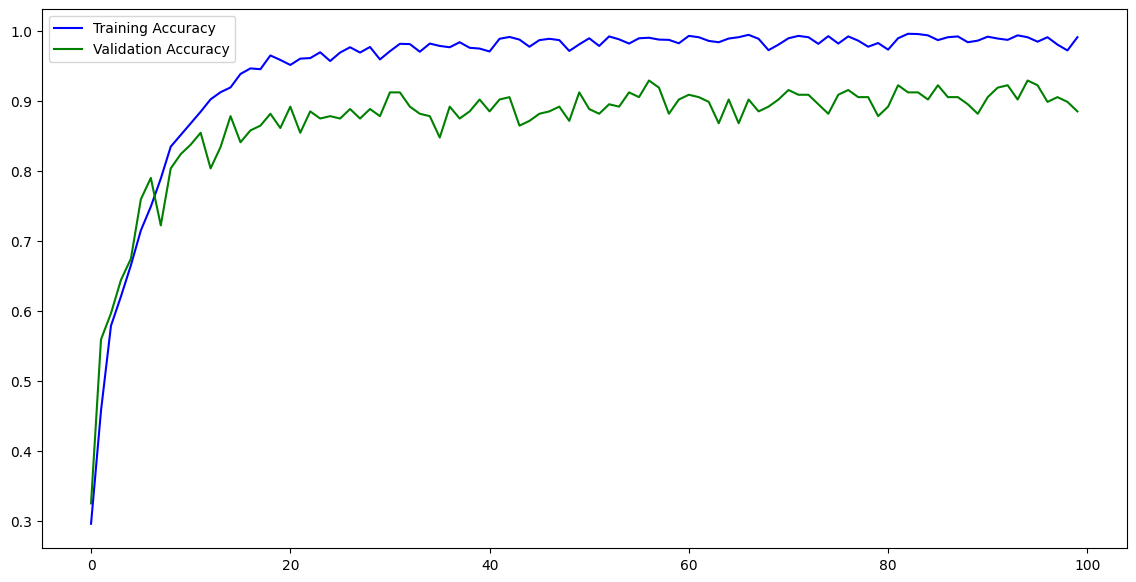

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'b',label="Training Accuracy")
plt.plot(epochs,val_acc,'g',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

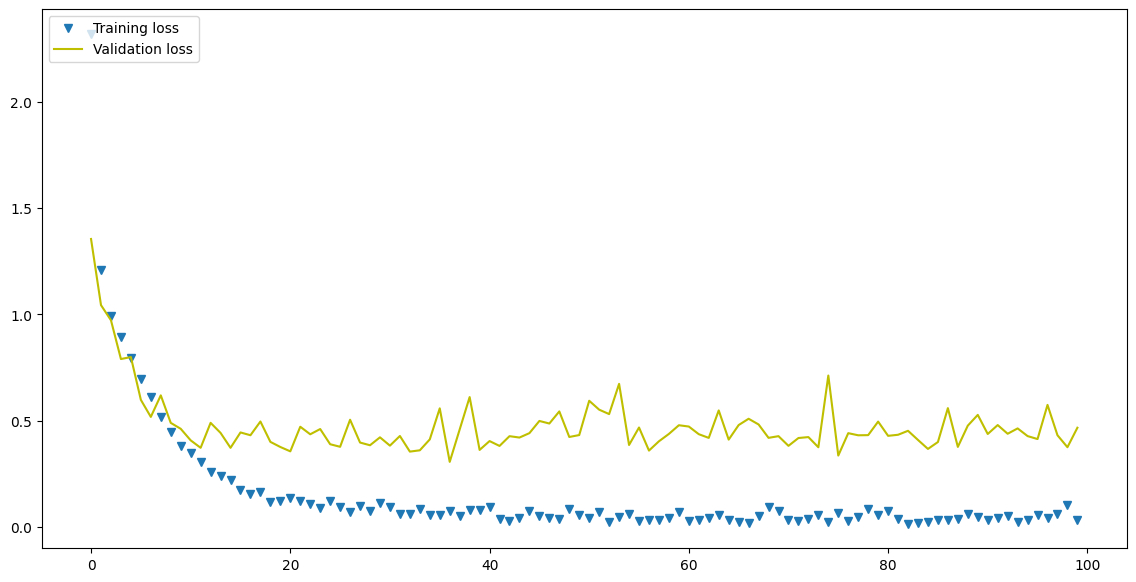

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'v',label="Training loss")
plt.plot(epochs,val_loss,'y',label="Validation loss")
plt.legend(loc='upper left')
plt.show()


In [ ]:
# Import necessary modules
import cv2
import numpy as np

# Load the image
img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/Training/meningioma_tumor/m (100).jpg')

# Check if the image is loaded successfully
if img is None:
    print("Error: Image not loaded")

# Resize the image
img = cv2.resize(img, (150, 150))

# Convert the image to a NumPy array
img_array = np.array(img)

# Print the shape of the image array
print(img_array.shape)

(150, 150, 3)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape


(1, 150, 150, 3)

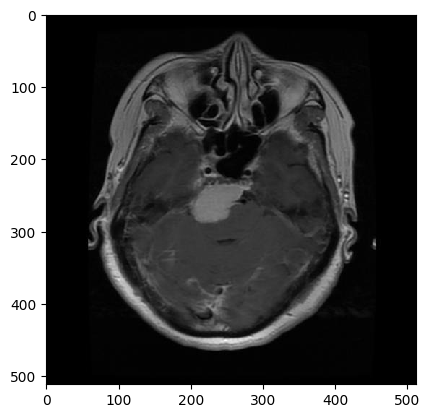

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/ColabNotebooks/Training/Training/meningioma_tumor/m (167).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
a=model.predict(img_array)
indices = a.argmax()
labels[indices]

1/1 [==============================] - 2s 2s/step


'meningioma_tumor'